In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(style="darkgrid")
from matplotlib.offsetbox import OffsetImage,AnnotationBbox
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go
from plotly import subplots

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# #install relevant python libraries
!pip install countryinfo
!pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 602.2/602.2 kB 10.8 MB/s eta 0:00:00a 0:00:01


In [4]:
kaggle_survery_df = pd.read_csv('../input/kaggle-survey-2022/kaggle_survey_2022_responses.csv')

In [5]:
pd.set_option('display.max_columns', None)
kaggle_survery_df.head(3)


,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What products or platforms did you find to be ...,What is the highest level of formal education ...,Have you ever published any academic research ...,Did your research make use of machine learning...,Did your research make use of machine learning...,Did your research make use of machine learning...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,Which of the

In [6]:
# Turn the first row into columns, this will be more efficient later on.

new_feature_col =  kaggle_survery_df.iloc[0] 
data =  kaggle_survery_df[1:] 
data.columns = new_feature_col

data.head(3)

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udacity,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Udemy,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - LinkedIn Learning,"On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Cloud-certification programs (direct from AWS, Azure, GCP, or similar)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - University Courses (resulting in a university degree),On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - None,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Other,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - University courses,"What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Online courses (Coursera, EdX, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Social media platforms (Reddit, Twitter, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Video platforms (YouTube, Twitch, etc)","What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Kaggle (notebooks, competitions, etc)",What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - None / I do not study data science,What products or platforms did you find to be most helpful when you first started studying data science? (Select all that apply) - Selected Choice - Other,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,"Have you ever published any academic research (papers, preprints, conference proceedings, etc)?","Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)","Did your research make use of machine learning? - Yes, the research made use of machine learning as a tool (applied research)",Did your research make use of machine learning? - No,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,What programming langu

In [7]:
# extract african countries
from countryinfo import CountryInfo

country = CountryInfo()

african_countries = {ke:val for ke, val in country.all().items() if 'region' in val.keys() and val['region']== "Africa"}
in_df_african_countries = []
for country in kaggle_survery_df["Q4"]:
    if country.lower() in african_countries:
        in_df_african_countries.append(country)

# **What popping in Africa?**

In [8]:
african_df = kaggle_survery_df[kaggle_survery_df["Q4"].isin(in_df_african_countries)]

In [9]:
african_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 2 to 23978
Columns: 296 entries, Duration (in seconds) to Q44_12
dtypes: object(296)
memory usage: 4.8+ MB


In [10]:
african_df.shape

(2115, 296)

In [11]:
african_df.describe()

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7,Q8,Q9,Q10_1,Q10_2,Q10_3,Q11,Q12_1,Q12_2,Q12_3,Q12_4,Q12_5,Q12_6,Q12_7,Q12_8,Q12_9,Q12_10,Q12_11,Q12_12,Q12_13,Q12_14,Q12_15,Q13_1,Q13_2,Q13_3,Q13_4,Q13_5,Q13_6,Q13_7,Q13_8,Q13_9,Q13_10,Q13_11,Q13_12,Q13_13,Q13_14,Q14_1,Q14_2,Q14_3,Q14_4,Q14_5,Q14_6,Q14_7,Q14_8,Q14_9,Q14_10,Q14_11,Q14_12,Q14_13,Q14_14,Q14_15,Q14_16,Q15_1,Q15_2,Q15_3,Q15_4,Q15_5,Q15_6,Q15_7,Q15_8,Q15_9,Q15_10,Q15_11,Q15_12,Q15_13,Q15_14,Q15_15,Q16,Q17_1,Q17_2,Q17_3,Q17_4,Q17_5,Q17_6,Q17_7,Q17_8,Q17_9,Q17_10,Q17_11,Q17_12,Q17_13,Q17_14,Q17_15,Q18_1,Q18_2,Q18_3,Q18_4,Q18_5,Q18_6,Q18_7,Q18_8,Q18_9,Q18_10,Q18_11,Q18_12,Q18_13,Q18_14,Q19_1,Q19_2,Q19_3,Q19_4,Q19_5,Q19_6,Q19_7,Q19_8,Q20_1,Q20_2,Q20_3,Q20_4,Q20_5,Q20_6,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22,Q23,Q24,Q25,Q26,Q27,Q28_1,Q28_2,Q28_3,Q28_4,Q28_5,Q28_6,Q28_7,Q28_8,Q29,Q30,Q31_1,Q31_2,Q31_3,Q31_4,Q31_5,Q31_6,Q31_7,Q31_8,Q31_9,Q31_10,Q31_11,Q31_12,Q32,Q33_1,Q33_2,Q33_3,Q33_4,Q33_5,Q34_1,Q34_2,Q34_3,Q34_4,Q34_5,Q34_6,Q34_7,Q34_8,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6,Q35_7,Q35_8,Q35_9,Q35_10,Q35_11,Q35_12,Q35_13,Q35_14,Q35_15,Q35_16,Q36_1,Q36_2,Q36_3,Q36_4,Q36_5,Q36_6,Q36_7,Q36_8,Q36_9,Q36_10,Q36_11,Q36_12,Q36_13,Q36_14,Q36_15,Q37_1,Q37_2,Q37_3,Q37_4,Q37_5,Q37_6,Q37_7,Q37_8,Q37_9,Q37_10,Q37_11,Q37_12,Q37_13,Q38_1,Q38_2,Q38_3,Q38_4,Q38_5,Q38_6,Q38_7,Q38_8,Q39_1,Q39_2,Q39_3,Q39_4,Q39_5,Q39_6,Q39_7,Q39_8,Q39_9,Q39_10,Q39_11,Q39_12,Q40_1,Q40_2,Q40_3,Q40_4,Q40_5,Q40_6,Q40_7,Q40_8,Q40_9,Q40_10,Q40_11,Q40_12,Q40_13,Q40_14,Q40_15,Q41_1,Q41_2,Q41_3,Q41_4,Q41_5,Q41_6,Q41_7,Q41_8,Q41_9,Q42_1,Q42_2,Q42_3,Q42_4,Q42_5,Q42_6,Q42_7,Q42_8,Q42_9,Q43,Q44_1,Q44_2,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
count,2115,2115,2115,2115,2115,908,205,591,552,34,429,486,257,146,455,215,418,456,1309,322,1126,1018,93,129,2062,960,93,126,131,2051,1542,386,766,245,111,358,323,314,84,200,260,14,13,26,90,358,317,391,801,554,266,289,220,53,223,1153,131,38,114,711,610,82,18,122,45,37,17,83,12,38,25,31,15,581,51,1148,836,342,314,59,45,16,48,111,34,35,19,12,313,61,1644,866,642,529,307,38,268,106,92,58,33,29,78,48,151,51,909,687,348,279,60,250,450,88,277,123,79,129,115,56,153,188,181,278,91,50,86,12,153,120,60,131,83,9,260,143,77,21,23,23,51,531,510,77,299,653,524,522,520,511,300,132,103,80,83,83,98,39,486,496,83,76,93,33,22,10,11,6,3,5,74,9,84,48,48,64,46,3,26,37,46,14,72,28,39,4,137,73,68,37,42,5,12,69,18,6,15,11,31,22,57,2,8,122,41,4,92,4,2,1,5,0,5,8,0,91,14,24,32,19,7,18,4,2,4,0,2,3,158,7,37,2,13,7,14,31,165,6,37,14,9,0,5,2,2,4,2,29,167,7,8,18,3,38,0,3,26,2,1,2,4,1,5,155,9,23,18,16,21,8,7,2,174,4,115,34,6,3,1,1,0,106,8,234,555,399,178,990,481,1069,157,562,247,234,88,70
unique,1134,11,4,11,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,7,2,1,1,1,7,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,9,15,15,5,7,6,1,1,1,1,1,1,1,1,25,6,1,1,1,1,1,1,1,1,1,1,1,1,9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,5,1,1,1,1,1,1,1,1,1,1,1,1
top,322,25-29,Man,Nigeria,Yes,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other,Bachelor’s degree,No,"Yes, the research made advances related to som...","Yes, the research made use of machine learning...",No,1-3 years,Python,R,SQL,C,C#,C++,Java,Java

In [12]:
african_df.nunique()

Duration (in seconds)    1134
Q2                         11
Q3                          4
Q4                         11
Q5                          2
                         ... 
Q44_8                       1
Q44_9                       1
Q44_10                      1
Q44_11                      1
Q44_12                      1
Length: 296, dtype: int64

# **How many from each african country participate in Kaggle?**

In [13]:
african_df["Q4"].value_counts()

Nigeria         731
Egypt           383
Kenya           201
Morocco         177
Tunisia         125
South Africa    109
Ghana           107
Ethiopia         98
Cameroon         68
Algeria          62
Zimbabwe         54
Name: Q4, dtype: int64

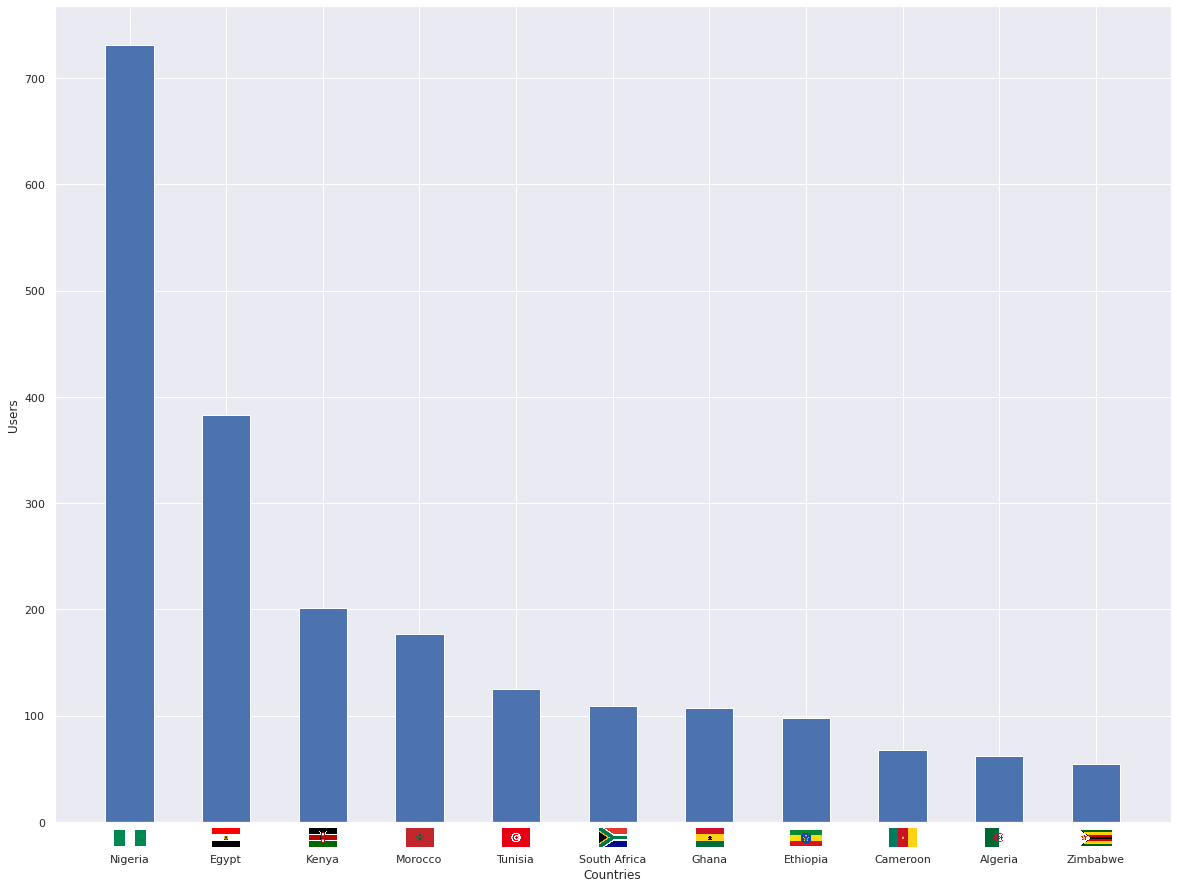

In [14]:
# Annotate an image into a bar plot

def read_flag(flag):
    '''Read an image or a flag'''
    path = f"../input/images/{flag}.png"
    image = plt.imread(path)
    return image

def offset_image(coord,flag, ax):
    '''Position an image inside of a plot'''
    image = read_flag(flag)
    img = OffsetImage(image, zoom=0.10)
    img.image.axes = ax
    
    ab = AnnotationBbox(img, (coord, 0),  xybox=(0., -16.), frameon=False,
                        xycoords='data',  boxcoords="offset points", pad=0)

    ax.add_artist(ab)

# Get countries and users
countries = african_df["Q4"].value_counts().index
number_of_users = african_df["Q4"].value_counts()



fig, ax = plt.subplots(figsize=(20,15))

ax.bar(range(len(countries)),number_of_users, width=0.5,align="center")
ax.set_xlabel("Countries")
ax.set_ylabel("Users")


ax.set_xticks(range(len(countries)))
ax.set_xticklabels(countries)
ax.tick_params(axis='x', which='major', pad=26)
    

for i, c in enumerate(countries):
    offset_image(i, c, ax)

plt.show()  

# colors = ["yellow",""]
# african_df["Q4"].value_counts().sort_values().plot(kind='bar',color="green")

In [15]:
px.bar(x = african_df["Q4"].value_counts().index,
       y =  african_df["Q4"].value_counts(),
       color =  african_df["Q4"].value_counts().index,
       hover_name =  african_df["Q4"].value_counts())

In [16]:
# group by country country
temporay_df_map =african_df.groupby('Q4',
                                    as_index=False)[['Q3']].count().sort_values(by='Q3',
                                                                                     ascending=False).reset_index(drop=True)

# Rename the columns
temporay_df_map['Country'] = temporay_df_map.Q4
temporay_df_map["Count"] = temporay_df_map.Q3

In [17]:
# plot a map
fig=px.choropleth(temporay_df_map,locations=temporay_df_map.Country,
                  locationmode='country names',
                  color= temporay_df_map.Count,
                  range_color=(0, 12),
                  hover_name=temporay_df_map.Country,
                  hover_data=['Count'],
                  color_continuous_scale="Viridis",
                  scope='africa',
                  title='<b>Kagglers in <b>')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


# **Distribution of Age in Africa**

In [18]:
temporay_df_age=african_df.groupby('Q2',as_index=False)[['Q4']].count().sort_values(by='Q4',ascending=False).reset_index(drop=True)
temporay_df_age["Age_Group"] = temporay_df_age.Q2
temporay_df_age["Age_Count"] = temporay_df_age.Q4
temporay_df_age

temporay_df_age.drop(columns=['Q2','Q4'])

,Age_Group,Age_Count
0,25-29,545
1,22-24,490
2,18-21,348
3,30-34,287
4,35-39,190
5,40-44,128
6,45-49,54
7,50-54,32
8,60-69,23
9,55-59,17


In [19]:
fig = px.box(temporay_df_age, y="Age_Group")
fig.show()

In [20]:
# view in a bar graph
fig=px.bar(temporay_df_age,x='Age_Group',y='Age_Count',text='Age_Count',color='Age_Group',template='seaborn',title='<b>Most participating Age Group')
fig.show()

#### **Age vs Country**

In [21]:

countries = african_df.Q4.unique()

countries_df = african_df[african_df['Q4'].isin(countries)]
fig = px.density_heatmap(
    countries_df, x='Q4', y='Q2',
    marginal_x='histogram', 
    marginal_y='histogram', 
    histfunc='count',
    template='seaborn'
)

fig.update_yaxes(categoryorder='array', categoryarray= ['18-21','22-24','25-29','30-34', '35-39',
                                                        '40-44', '45-49', '50-54', '55-59', '60-69', '70+'])

fig.update_layout(
    title="<b>Countries vs Age Groups Density Plot",
    xaxis_title="Countries",
    yaxis_title="Age Groups",
    font=dict(
        size=14
    )
)

fig.show()


#### **Age vs Duration to complete a course**

In [22]:
# Convert objects to numbers
duration = african_df['Duration (in seconds)']
african_df['Duration (in seconds)'] = pd.to_numeric(duration)

In [23]:
african_df['Duration (in seconds)'] # View

2         462
3         293
12        369
27        301
54       1610
         ... 
23929    3613
23957     306
23970     796
23977    1002
23978     296
Name: Duration (in seconds), Length: 2115, dtype: int64

In [24]:
age_duration_data = african_df[african_df['Duration (in seconds)']<2000].groupby('Q2')['Duration (in seconds)'].mean().round(1).reset_index()

fig=px.bar(data_frame=age_duration_data, x='Q2', y='Duration (in seconds)',
           color='Q2',template= 'seaborn',color_discrete_sequence=["blue","green"], text_auto=True,barmode='stack',
           title="Age Countplot")

fig.update_traces(textfont_size=25, textangle=0, textposition="outside", cliponaxis=False)
fig.update_traces( marker_line_color='#3f484b', marker_line_width=3.5)

fig.update_layout(title="<b>Duration in Seconds by Each Age Group",
                  xaxis_title="Age Groups",
                  yaxis_title="Duration (in seconds)",
                  legend_title="Age Groups",
                  font=dict(size=12))

fig.show()

# **Learning Platforms African Kagglers use to Learn Data Science**


In [25]:
learnig_plaforms = african_df.loc[:,['Q6_1','Q6_2','Q6_3','Q6_4','Q6_5','Q6_6', 'Q6_7','Q6_8','Q6_9','Q6_10','Q6_11','Q6_12']]
learnig_plaforms.head()

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,University Courses (resulting in a university ...,NaN,NaN
3,Coursera,edX,NaN,DataCamp,NaN,Udacity,Udemy,LinkedIn Learning,NaN,University Courses (resulting in a university ...,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN
27,NaN,NaN,NaN,NaN,NaN,NaN,Udemy,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,Kaggle Learn Courses,NaN,NaN,Udacity,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
learnig_plaforms.describe()

,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,Q6_6,Q6_7,Q6_8,Q6_9,Q6_10,Q6_11,Q6_12
count,908,205,591,552,34,429,486,257,146,455,215,418
unique,1,1,1,1,1,1,1,1,1,1,1,1
top,Coursera,edX,Kaggle Learn Courses,DataCamp,Fast.ai,Udacity,Udemy,LinkedIn Learning,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,None,Other
freq,908,205,591,552,34,429,486,257,146,455,215,418


In [27]:
# Check out the plaforms

platform=['Coursera','edX','Kaggle Learn Courses','DataCamp','Fast.ai','Udacity','Udemy','LinkedIn Learning','Cloud-certification programs','University Courses','None','Other']
count=[908,205,591,552,944,34,429,486,257,146,215,418]
platform_df=pd.DataFrame({'Platform':platform,'Count':count})
platform_df

,Platform,Count
0,Coursera,908
1,edX,205
2,Kaggle Learn Courses,591
3,DataCamp,552
4,Fast.ai,944
5,Udacity,34
6,Udemy,429
7,LinkedIn Learning,486
8,Cloud-certification programs,257
9,University Courses,146


In [28]:
plaplatform_df=platform_df.sort_values(by='Count',ascending=False).reset_index(drop=True)
fig=px.bar(platform_df,x='Platform',y='Count',color='Platform',text='Count',template='seaborn',title='<b>Platforms used by African Kagglers for completing Data Science Courses')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

# **Learning Platforms African Kagglers use to get started in Data Science**

In [29]:
learnig_plaforms = african_df.loc[:,["Q7_1","Q7_2","Q7_3","Q7_4","Q7_5","Q7_6","Q7_7"]]
learnig_plaforms.head(3)

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
2,University courses,NaN,NaN,NaN,"Kaggle (notebooks, competitions, etc)",NaN,NaN
3,NaN,"Online courses (Coursera, EdX, etc)",NaN,"Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",NaN,NaN
12,University courses,NaN,NaN,"Video platforms (YouTube, Twitch, etc)",NaN,NaN,NaN


In [30]:
learnig_plaforms.describe()

,Q7_1,Q7_2,Q7_3,Q7_4,Q7_5,Q7_6,Q7_7
count,456,1309,322,1126,1018,93,129
unique,1,1,1,1,1,1,1
top,University courses,"Online courses (Coursera, EdX, etc)","Social media platforms (Reddit, Twitter, etc)","Video platforms (YouTube, Twitch, etc)","Kaggle (notebooks, competitions, etc)",None / I do not study data science,Other
freq,456,1309,322,1126,1018,93,129


In [31]:
platforms_=['University courses','Online courses','Social media platforms','Video platforms','Kaggle','None','Other']
count_=[456,1309,322,1126,1018,93,129]
platform_df=pd.DataFrame({'Platform':platforms_,'Count':count_})
platform_df

,Platform,Count
0,University courses,456
1,Online courses,1309
2,Social media platforms,322
3,Video platforms,1126
4,Kaggle,1018
5,None,93
6,Other,129


In [32]:
plat_form_df=platform_df.sort_values(by='Count',ascending=False).reset_index(drop=True)
fig=px.bar(platform_df,x='Platform',y='Count',color='Platform',text='Count',template='seaborn',title='<b>Platforms used by African to get started in Data Science')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()

# **Gender Anaylsis**

In [33]:
# Count
african_df.Q3.value_counts()

Man                  1593
Woman                 505
Prefer not to say      13
Nonbinary               4
Name: Q3, dtype: int64

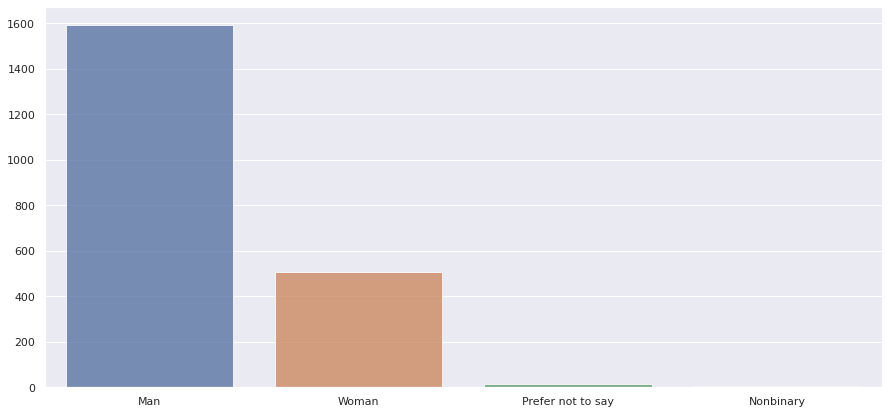

In [34]:
# plot Count 
plt.figure(figsize=(15,7))
counts = african_df.Q3.value_counts()
sns.barplot(counts.index, counts.values, alpha=0.8);

In [35]:
fig=px.pie(values=[11593,505,13,4],names=['Male','Female','PreferNotSay','Non-Binary'],hole=.8,template='seaborn')
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.add_annotation(dict(x=0.5, y=0.5,  align='center',
                        xref = "paper", yref = "paper",
                        showarrow = False, font_size=22,
                        text="<b>Gender</b>"))
fig.show()

# **Published Research Papers**

In [40]:
african_df.Q9.value_counts()

No     649
Yes    311
Name: Q9, dtype: int64

In [42]:
publish=['No','Yes']
count=[ 649,311]
df5=pd.DataFrame({'Published':publish,'Count':count})
df5.head()
fig=px.pie(df5,names='Published',values='Count',hole=0.7,template='simple_white',color_discrete_sequence=['#FFA500','#4682B4'],title='<b>Published any Academic research?')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',y=1.02,xanchor='right',x=1))
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# **Years as a programmer**

In [46]:
ex=african_df.groupby('Q16',as_index=False)['Duration (in seconds)'].count()
ex['Experience in ML']=ex['Q16']
ex['Count']=ex['Duration (in seconds)']
ex.drop(['Q16','Duration (in seconds)'],axis=1,inplace=True)
ex=ex.sort_values(by='Count',ascending=False).reset_index(drop=True)
fig=px.bar(ex,x='Experience in ML',y='Count',color='Experience in ML',template='seaborn',text='Count',title='<b>how many years of experience does Kagglers have in machine learning?')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))
fig.show()
fig=px.pie(ex,names='Experience in ML',values='Count',color='Experience in ML',template='seaborn',hole=.6)
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))

fig.show()



# **What are you doing now**

In [48]:
count=[1929, 1538, 1432, 980, 833, 832, 754, 593, 571, 465, 352, 125, 95, 70, 61]
role=['Data Scientist','Data Analyst','Currently not employed','Software Engineer','Teacher / professor','Manager','Other','Research Scientist','Machine Learning/ MLops Engineer','Engineer ','Data Engineer','Statistician','Data Architect','Data Administrator','Developer Advocate']
job=pd.DataFrame({'Job Title':role,'Count':count})
job=job.sort_values(by='Count',ascending=False).reset_index(drop=True)
fig=px.bar(job,x='Job Title',y='Count',color='Job Title',template='seaborn',text='Count',title='<b>Current job role of Kagglers ')
fig.update_layout(title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.6)))

fig.show()